In [2]:
from TMclass import *
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xml.etree import ElementTree

def flush_many(max_vol, vol_dataset, phi_mode, start, nbits, ndata, level, partition):
    global PHI
    global phi

    def _new_start(start,end):
        start += datetime.timedelta(days=1)
        start = start.replace(hour=3,minute=0,second=0)
        if end > start:
            start = end + datetime.timedelta(hours=1)
        return start
    

    vol0 = max_vol[0]
    vol1 = max_vol[1]
    n0 = int(vol0 // vol_dataset * 0.99)
    n1 = int(vol1 // vol_dataset * 0.99)

    if ndata == -1:
        ndata = phi_mode.raw.n_datasets
    
    print(f'Days needed: {(ndata-n0)//n1+2}')
    kw = phi_mode.compressing(start, nbits = nbits, ndata = n0,level=level); phi.saving(partition,**kw); PHI.saving(partition,**kw)
    # start += datetime.timedelta(days=1)
    start = _new_start(start,kw['end'])

    for i in range((ndata-n0)//n1+1):
        kw = phi_mode.compressing(start, nbits = nbits, ndata = n1,level=level); phi.saving(partition,**kw); PHI.saving(partition,**kw)
        start = _new_start(start,kw['end'])

    return (phi_mode, kw)

PHI = PHI_MEMORY(datetime.datetime.fromisoformat('2022-01-19T23:00:00'))

TM = {'date':[], 'tm_rate':[], 'duration':[]}
TMnew = {'date':[], 'tm_rate':[], 'duration':[]}

with open('../telem.xml') as f:
	tree = ElementTree.parse(f)

for node in tree.iter('PASS'):
    d = datetime.datetime.fromisoformat(node.attrib.get('comment')[:-1]).date()
    if d >= datetime.date(2022,1,1) and d <= datetime.date(2023,1,1):
        TM['date'] += [datetime.datetime.fromisoformat(node.attrib.get('comment')[:-1])]
        TM['tm_rate'] += [float(node.attrib.get('tm_rate'))]
        TM['duration'] += [int(node.attrib.get('duration'))]

with open('../EFECS_M06_V00.xml') as f:
	tree = ElementTree.parse(f)

for node in tree.iter('PASS'):
    d = datetime.datetime.strptime(node.attrib.get('time')[:-1],"%Y-%jT%H:%M:%S").date()
    if d >= datetime.date(2022,1,1) and d <= datetime.date(2023,1,1):
        TMnew['date'] += [datetime.datetime.strptime(node.attrib.get('time')[:-1],"%Y-%jT%H:%M:%S")]
        TMnew['tm_rate'] += [float(node.attrib.get('tm_rate'))]
        TMnew['duration'] += [int(node.attrib.get('duration'))]

TM['date'] = np.asarray(TM['date'])
TM['tm_rate'] = np.asarray(TM['tm_rate'])
TM['duration'] = np.asarray(TM['duration'])

TMnew['date'] = np.asarray(TMnew['date'])
TMnew['tm_rate'] = np.asarray(TMnew['tm_rate'])
TMnew['duration'] = np.asarray(TMnew['duration'])

f = open('phi.itl','r')
lines = f.readlines()

FL = {'date':[], 'flush':[]}

for x in lines:
    temp = x.split(' ')
    if 'PHI_SCI_Flush_VOL' in temp[-1]:
        FL['date'] += [datetime.datetime.fromisoformat(temp[0][:-1])]
        FL['flush'] += [float(temp[-1][19:-2])]
        # print(temp[0][:-1],temp[-1][19:-2])

FL['date'] = np.asarray(FL['date'])
FL['flush'] = np.asarray(FL['flush'])

f = open('phi.itl','r')
lines = f.readlines()

# SV = {'date':[], 'rate':[]}

# for x in lines:
#     temp = x.split(' ')
#     if 'PHI_SCI_Rate' in temp[-1]:
#         SV['date'] += [datetime.datetime.fromisoformat(temp[0][:-1])]
#         SV['rate'] += [float(temp[-1][14:-2])]
#         # print(temp[0][:-1],temp[-1][19:-2])

# SV['date'] = np.asarray(SV['date'])
# SV['rate'] = np.asarray(SV['rate'])

f = open('phi_new.itl','r')
lines = f.readlines()

FLnew = {'date':[], 'flush':[]}

for x in lines:
    temp = x.split(' ')
    if 'PHI_SCI_Flush_VOL' in temp[-1]:
        FLnew['date'] += [datetime.datetime.fromisoformat(temp[0][:-1])]
        FLnew['flush'] += [float(temp[-1][19:-2])]
        # print(temp[0][:-1],temp[-1][19:-2])

FLnew['date'] = np.asarray(FLnew['date'])
FLnew['flush'] = np.asarray(FLnew['flush'])



Text(0.5, 0, 'date')

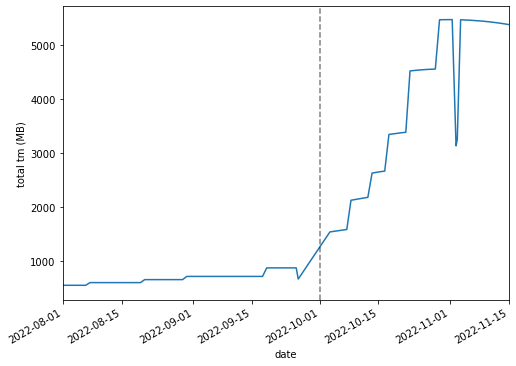

In [3]:
plt.figure(figsize=(8,6))
plt.plot(TM['date'], (TM['tm_rate']*TM['duration'])/8/1e6)#; plt.ylim(0,5000)
plt.xlim(datetime.date(2022,8,1),datetime.date(2022,11,15))
plt.gcf().autofmt_xdate()
plt.axvline(datetime.datetime(2022,10,1),color='k',linestyle='--',alpha=.5)
# plt.plot(TMnew['date'], np.cumsum(TMnew['tm_rate']*TMnew['duration']));
# plt.ylabel('total tm_rate (bit/s)')
plt.ylabel('total tm (MB)')
plt.xlabel('date')


# <span style="color:blue">AR-HRES-RSW1</span>


## <span style="color:pink">AR observation in RSW1, 2d duration, 10m cadence, no cropping, processing on-board</span>

AR-HRES-RSW1, 2d@10m, no crop, proc
number of datasets: 288
cadence: 10 mins
duration: 2 days, 0:00:00
amount of raw-data at 32 bits: 114257.8 MiB, 396.7 MiB per dataset
processing time: 7 days, 0:00:00
amount of processed data (and intermediate data) at 16 bits: 127441.4 MiB, 53.4 MiB per dataset
compressing (+ flushing) time: 10:21:15.586560
amount of compressed data + metadata at 6 bits: 4443.6 MiB, 15.4 MiB per dataset
amount of metadata:  4608 MiB
amount of memory usage: 243896.5 MiB



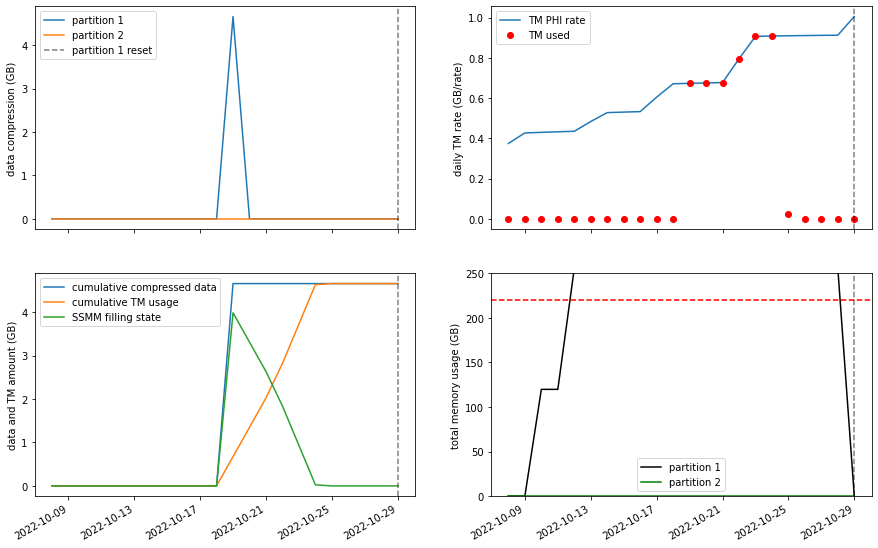

In [27]:
t0 = datetime.datetime.fromisoformat('2022-10-10T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-10-12T00:00:00')
PHI1 = PHI_MEMORY(t0-datetime.timedelta(days=2))

AR1 = PHI_MODE('HRT')
kw = AR1.observation(t0,t1,cadence=10,shape=(2048,2048,4,6)); PHI1.saving(1,**kw)
kw = AR1.processing(kw['end'],ndata=-1,partialStore=0x00,nout=5,level='raw',); PHI1.saving(1,**kw)
kw = AR1.compressing(kw['end'],ndata=-1,nbits=6,level='proc'); PHI1.saving(1,**kw)

printp(AR1,label='AR-HRES-RSW1, 2d@10m, no crop, proc')
# plot_tot(PHI1,ylim=(0,250))

PHI1.format_partition(1,kw['end'] + datetime.timedelta(days=10))
final_plot(PHI1,TM)

## <span style="color:pink">AR observation in RSW1, 10d duration, 1h cadence, no cropping, processing on-board</span>

AR-HRES-RSW1, 2d@10m, no crop, proc
number of datasets: 288
cadence: 60 mins
duration: 12 days, 0:00:00
amount of raw-data at 32 bits: 59326.2 MiB, 206.0 MiB per dataset
amount of crop-data at 32 bits: 30761.7 MiB, 106.8 MiB per dataset
cropping time: 3:33:41.184000
processing time: 7 days, 0:00:00
amount of processed data (and intermediate data) at 16 bits: 35156.2 MiB, 22.9 MiB per dataset
compressing (+ flushing) time: 2:48:16.496640
amount of compressed data + metadata at 6 bits: 1203.6 MiB, 4.2 MiB per dataset
amount of metadata:  6912 MiB
amount of memory usage: 127441.4 MiB



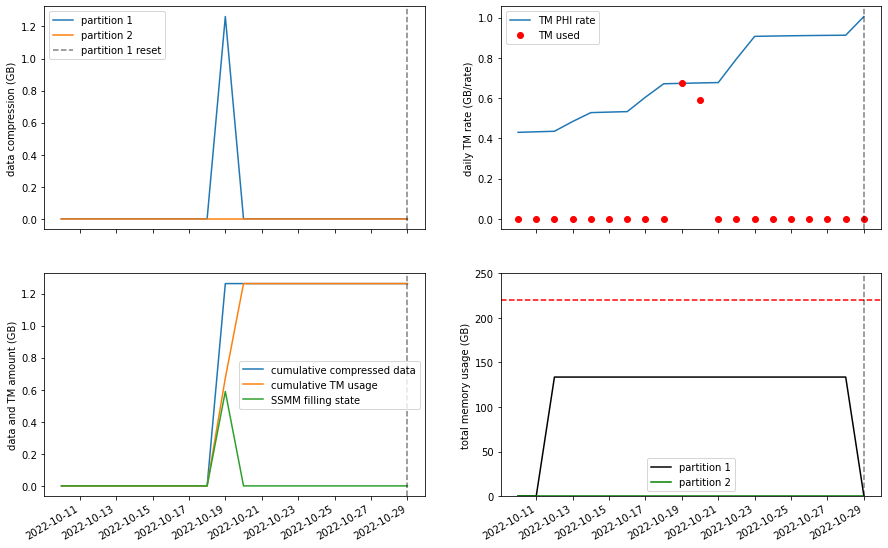

In [12]:
t0 = datetime.datetime.fromisoformat('2022-10-12T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-10-24T00:00:00')
PHI1 = PHI_MEMORY(t0-datetime.timedelta(days=2))

AR1 = PHI_MODE('HRT')
kw = AR1.observation(t0,t1,cadence=60,shape=(2048,1024,4,6)); PHI1.saving(1,**kw)
kw = AR1.cropping(t0,[1024,1024],ndata=-1,level='raw'); PHI1.saving(1,**kw)
kw = AR1.processing(kw['end'],ndata=-1,partialStore=0x00,nout=5,level='raw.crop',); PHI1.saving(1,**kw)
kw = AR1.compressing(kw['end'],ndata=-1,nbits=6,level='proc.crop'); PHI1.saving(1,**kw)

printp(AR1,label='AR-HRES-RSW1, 2d@10m, no crop, proc')
# plot_tot(PHI1,ylim=(0,250))

PHI1.format_partition(1,kw['end'] + datetime.timedelta(days=10))
final_plot(PHI1,TM)

## <span style="color:pink">AR observation in RSW1, 2d duration, 10m cadence, cropping 1kx1k, processing on-board</span>

AR-HRES-RSW1, 2d@10m, crop 1kx1k, proc
number of datasets: 288
cadence: 10 mins
duration: 2 days, 0:00:00
amount of raw-data at 32 bits: 59326.2 MiB, 206.0 MiB per dataset
amount of crop-data at 32 bits: 30761.7 MiB, 106.8 MiB per dataset
cropping time: 3:33:41.184000
processing time: 7 days, 0:00:00
amount of processed data (and intermediate data) at 16 bits: 35156.2 MiB, 22.9 MiB per dataset
compressing (+ flushing) time: 2:48:16.496640
amount of compressed data + metadata at 6 bits: 1203.6 MiB, 4.2 MiB per dataset
amount of metadata:  6912 MiB
amount of memory usage: 127441.4 MiB



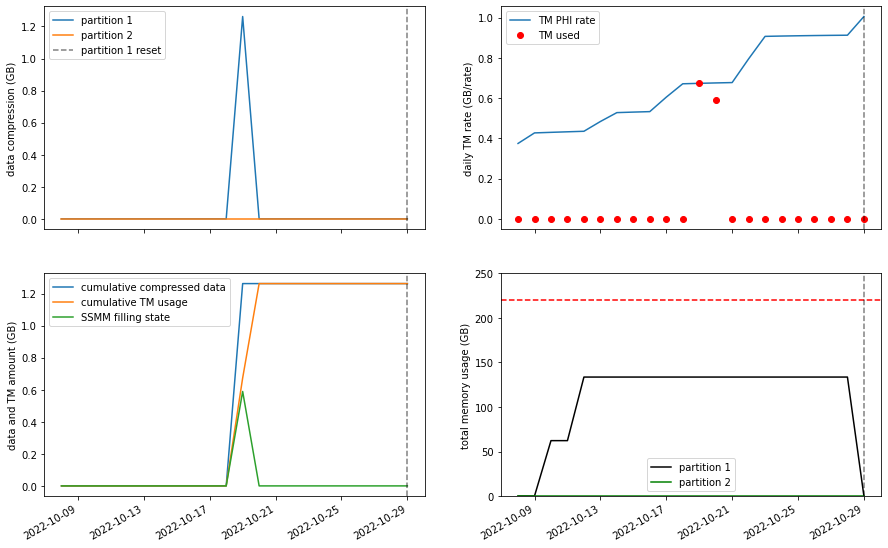

In [29]:
t0 = datetime.datetime.fromisoformat('2022-10-10T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-10-12T00:00:00')
PHI2 = PHI_MEMORY(t0-datetime.timedelta(days=2))

AR1 = PHI_MODE('HRT')
kw = AR1.observation(t0,t1,cadence=10,shape=(2048,1024,4,6)); PHI2.saving(1,**kw)
kw = AR1.cropping(kw['end'],crop=[1024,1024],ndata=-1,level='raw'); PHI2.saving(1,**kw)
kw = AR1.processing(kw['end'],ndata=-1,partialStore=0x00,nout=5,level='raw.crop'); PHI2.saving(1,**kw)
kw = AR1.compressing(kw['end'],ndata=-1,nbits=6,level='proc.crop'); PHI2.saving(1,**kw)

printp(AR1,label='AR-HRES-RSW1, 2d@10m, crop 1kx1k, proc')
# plot_tot(PHI2,ylim=(0,250))

PHI2.format_partition(1,kw['end'] + datetime.timedelta(days=10))
final_plot(PHI2,TM)

## <span style="color:pink">AR observation in RSW1, 2d duration, 10m cadence, cropping 1kx1k, processing on-board + 2 bursts</span>

AR-HRES-RSW1, 2d@10m, crop 1kx1k, proc
number of datasets: 288
cadence: 10 mins
duration: 2 days, 0:00:00
amount of raw-data at 32 bits: 59326.2 MiB, 206.0 MiB per dataset
amount of crop-data at 32 bits: 30761.7 MiB, 106.8 MiB per dataset
cropping time: 3:33:41.184000
processing time: 7 days, 0:00:00
amount of processed data (and intermediate data) at 16 bits: 35156.2 MiB, 22.9 MiB per dataset
compressing (+ flushing) time: 2:48:16.496640
amount of compressed data + metadata at 6 bits: 1203.6 MiB, 4.2 MiB per dataset
amount of metadata:  6912 MiB
amount of memory usage: 127441.4 MiB

AR-HRES-RSW1, 2h@1m, crop 1kx1k, proc
number of datasets: 120
cadence: 1 mins
duration: 1:00:00
amount of raw-data at 32 bits: 7324.2 MiB, 61.0 MiB per dataset
amount of crop-data at 32 bits: 4577.6 MiB, 38.1 MiB per dataset
cropping time: 0:55:20.400000
processing time: 2 days, 22:00:00
amount of processed data (and intermediate data) at 16 bits: 6408.7 MiB, 22.9 MiB per dataset
compressing (+ flushing) t

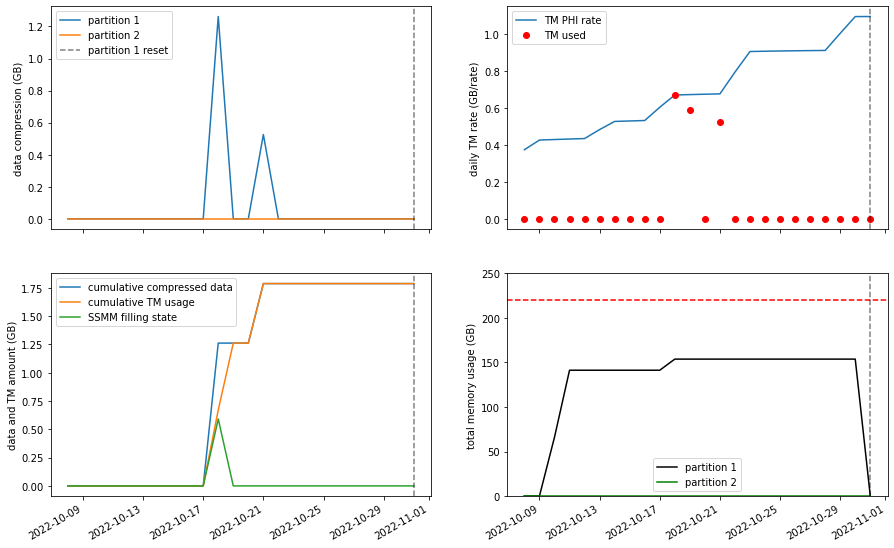

In [30]:
t0 = datetime.datetime.fromisoformat('2022-10-10T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-10-12T00:00:00')
PHI3 = PHI_MEMORY(t0-datetime.timedelta(days=2))

AR1 = PHI_MODE('HRT')
AR1b = PHI_MODE('HRT')
kw = AR1.observation(t0,t1,cadence=10,shape=(2048,1024,4,6)); PHI3.saving(1,**kw)
kw = AR1b.observation(t0 + datetime.timedelta(hours=12),60,cadence=1,shape=(2048,1024,1,6)); PHI3.saving(1,**kw)
kw = AR1b.observation(t0 + datetime.timedelta(hours=12+24),60,cadence=1,shape=(2048,1024,1,6)); PHI3.saving(1,**kw)
kw = AR1.cropping(kw['end'],crop=[1024,1024],ndata=-1,level='raw'); PHI3.saving(1,**kw)
kw = AR1.processing(kw['end'],ndata=-1,partialStore=0x00,nout=5,level='raw.crop'); PHI3.saving(1,**kw)
kw = AR1.compressing(kw['end'],ndata=-1,nbits=6,level='proc.crop'); PHI3.saving(1,**kw)

kw = AR1b.cropping(kw['end'],crop=[1024,1024],ndata=-1,level='raw'); PHI3.saving(1,**kw)
kw = AR1b.processing(kw['end'],ndata=-1,partialStore=0x00,nout=5,level='raw.crop'); PHI3.saving(1,**kw)
kw = AR1b.compressing(kw['end'],ndata=-1,nbits=6,level='proc.crop'); PHI3.saving(1,**kw)

printp(AR1,label='AR-HRES-RSW1, 2d@10m, crop 1kx1k, proc')
printp(AR1b,label='AR-HRES-RSW1, 2h@1m, crop 1kx1k, proc')
# plot_tot(PHI3,ylim=(0,250))

PHI3.format_partition(1,kw['end'] + datetime.timedelta(days=10))
final_plot(PHI3,TM)

# <span style="color:blue">LOOP-RSW1-2</span>


## <span style="color:pink">LOOP observation in RSW1-2,1h duration, 1m cadence, no cropping, raw</span>

LOOP-RSW1-2, 1h@1m, no crop, raw
number of datasets: 60
cadence: 1 mins
duration: 1:00:00
amount of raw-data at 32 bits: 23803.7 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 12359.6 MiB, 206.0 MiB per dataset
packing time: 1:23:48.384000
compressing (+ flushing) time: 10:04:03.106560
amount of compressed data + metadata at 6 bits: 4320.5 MiB, 72.0 MiB per dataset
amount of metadata:  960 MiB
amount of memory usage: 36163.3 MiB



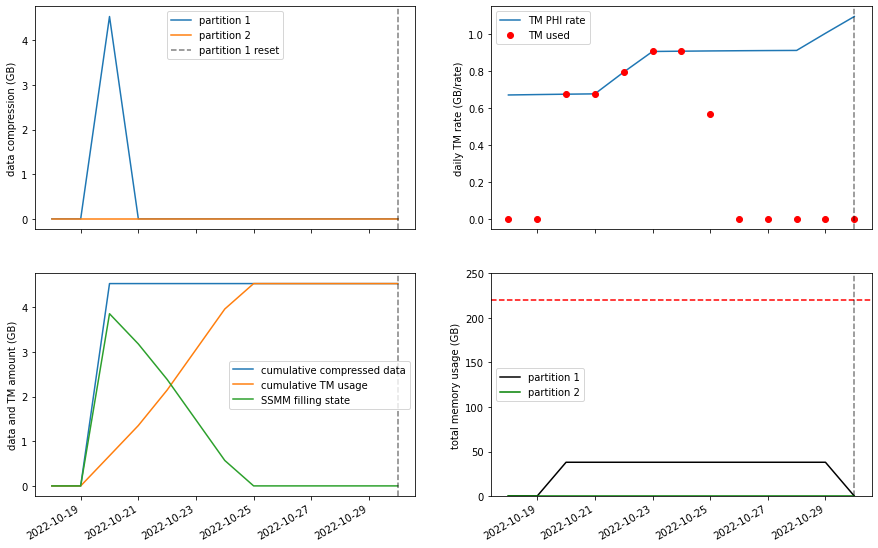

In [31]:
t0 = datetime.datetime.fromisoformat('2022-10-20T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-10-20T01:00:00')
PHI6 = PHI_MEMORY(t0-datetime.timedelta(days=2))

AR2 = PHI_MODE('HRT')
kw = AR2.observation(t0,t1,cadence=1,shape=(2048,2048,4,6)); PHI6.saving(1,**kw)
kw = AR2.packing(kw['end'],ndata=-1,level='raw',); PHI6.saving(1,**kw)
kw = AR2.compressing(kw['end'],ndata=-1,nbits=6,level='raw.pack'); PHI6.saving(1,**kw)

printp(AR2,label='LOOP-RSW1-2, 1h@1m, no crop, raw')
PHI6.format_partition(1,kw['end'] + datetime.timedelta(days=10))

# plot_tot(PHI4,ylim=(0,250))
final_plot(PHI6,TM)

# <span style="color:blue">AR-HRES-RSW2-3</span>


## <span style="color:pink">AR observation in RSW2-3,6h duration, 1m cadence, no cropping, raw</span>

AR-HRES-RSW2-3, 1d@1m, no crop, raw
number of datasets: 360
cadence: 1 mins
duration: 6:00:00
amount of raw-data at 32 bits: 74157.7 MiB, 206.0 MiB per dataset
amount of crop-data at 32 bits: 38452.1 MiB, 106.8 MiB per dataset
cropping time: 4:27:06.480000
processing time: 8 days, 18:00:00
amount of processed data (and intermediate data) at 16 bits: 43945.3 MiB, 22.9 MiB per dataset
compressing (+ flushing) time: 3:30:20.620800
amount of compressed data + metadata at 6 bits: 1504.5 MiB, 4.2 MiB per dataset
amount of metadata:  8640 MiB
amount of memory usage: 159301.8 MiB



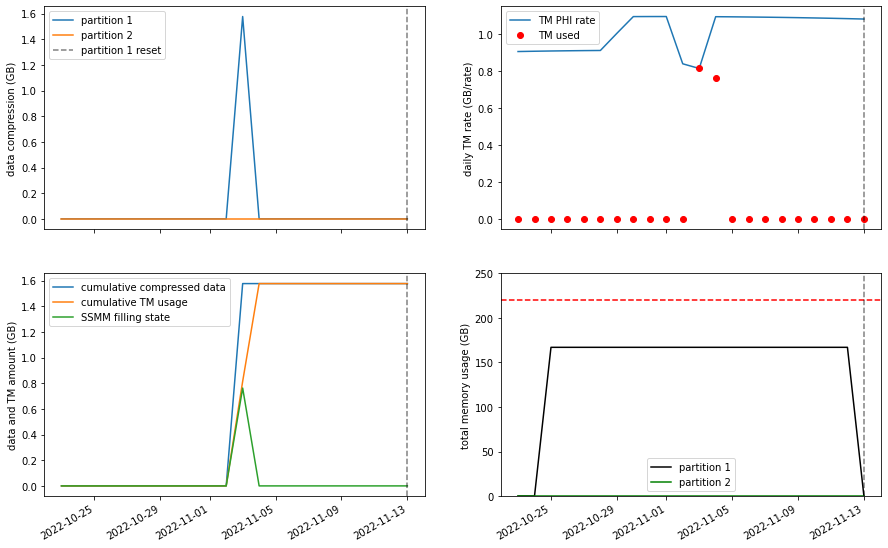

In [38]:
t0 = datetime.datetime.fromisoformat('2022-10-25T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-10-25T06:00:00')
PHI4 = PHI_MEMORY(t0-datetime.timedelta(days=2))

AR2 = PHI_MODE('HRT')
kw = AR2.observation(t0,t1,cadence=1,shape=(2048,1024,4,6)); PHI4.saving(1,**kw)
kw = AR2.cropping(kw['end'],crop=[1024,1024],ndata=-1); PHI4.saving(1,**kw)
# kw = AR2.packing(kw['end'],ndata=-1,level='raw',); PHI4.saving(1,**kw)
kw = AR2.processing(kw['end'],nout=5,ndata=-1,level='raw.crop',); PHI4.saving(1,**kw)
kw = AR2.compressing(kw['end'],ndata=-1,nbits=6,level='proc.crop'); PHI4.saving(1,**kw)

printp(AR2,label='AR-HRES-RSW2-3, 1d@1m, no crop, raw')
PHI4.format_partition(1,kw['end'] + datetime.timedelta(days=10))

# plot_tot(PHI4,ylim=(0,300))
final_plot(PHI4,TM)

## <span style="color:pink">AR observation in RSW2-3,1d duration, 1m cadence, cropping 1kx1k, raw</span>

AR-HRES-RSW2-3, 1d@1m, crop 1kx1k, raw
number of datasets: 360
cadence: 1 mins
duration: 6:00:00
amount of raw-data at 32 bits: 142822.3 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 74157.7 MiB, 206.0 MiB per dataset
packing time: 8:22:50.304000
compressing (+ flushing) time: 2 days, 12:24:18.639360
amount of compressed data + metadata at 6 bits: 25923.1 MiB, 72.0 MiB per dataset
amount of metadata:  5760 MiB
amount of memory usage: 216980.0 MiB



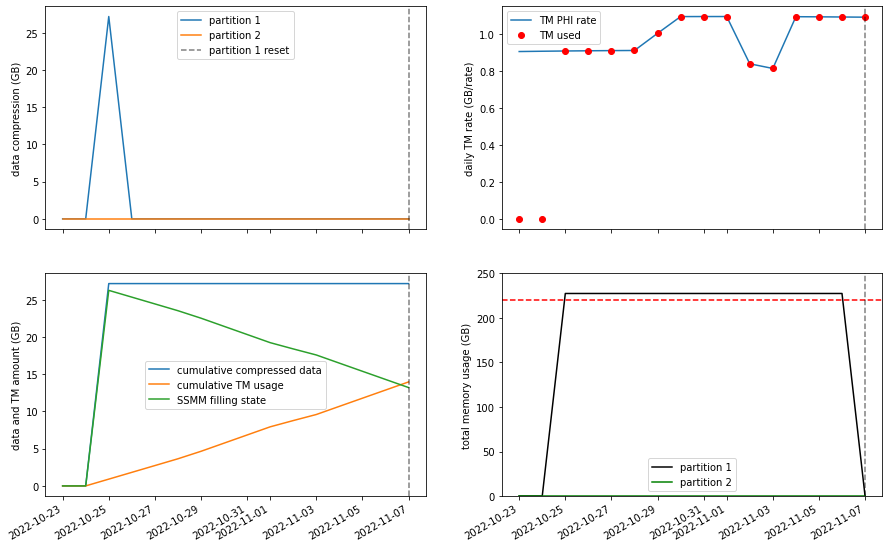

In [6]:
t0 = datetime.datetime.fromisoformat('2022-10-25T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-10-25T06:00:00')
PHI5 = PHI_MEMORY(t0-datetime.timedelta(days=2))

AR2 = PHI_MODE('HRT')
kw = AR2.observation(t0,t1,cadence=1,shape=(2048,2048,4,6)); PHI5.saving(1,**kw)
# kw = AR2.cropping(kw['end'],crop=[1024,1024],ndata=-1); PHI5.saving(1,**kw)
kw = AR2.packing(kw['end'],ndata=-1,level='raw',); PHI5.saving(1,**kw)
kw = AR2.compressing(kw['end'],ndata=-1,nbits=6,level='raw.pack'); PHI5.saving(1,**kw)

printp(AR2,label='AR-HRES-RSW2-3, 1d@1m, crop 1kx1k, raw')
# plot_tot(PHI5,ylim=(0,250))

PHI5.format_partition(1,kw['end'] + datetime.timedelta(days=10))
final_plot(PHI5,TM)

# <span style="color:blue">QS-HRES-RSW1</span>


## <span style="color:pink">QS observation in RSW1,1d duration, 2m cadence, no cropping, processing</span>

QS-HRES-RSW1, 1d@2m, no crop, proc
number of datasets: 720
cadence: 2 mins
duration: 1 day, 0:00:00
amount of raw-data at 32 bits: 285644.5 MiB, 396.7 MiB per dataset
processing time: 17 days, 12:00:00
amount of processed data (and intermediate data) at 16 bits: 318603.5 MiB, 53.4 MiB per dataset
compressing (+ flushing) time: 1 day, 1:53:08.966400
amount of compressed data + metadata at 6 bits: 11109.0 MiB, 15.4 MiB per dataset
amount of metadata:  11520 MiB
amount of memory usage: 609741.2 MiB



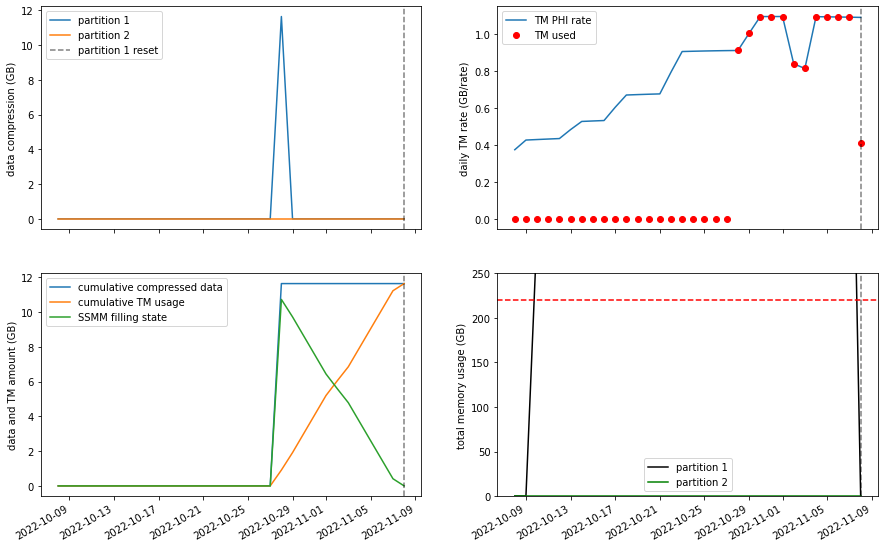

In [34]:
t0 = datetime.datetime.fromisoformat('2022-10-10T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-10-11T00:00:00')
PHI7 = PHI_MEMORY(t0-datetime.timedelta(days=2))

QS1 = PHI_MODE('HRT')
kw = QS1.observation(t0,t1,cadence=2,shape=(2048,2048,4,6)); PHI7.saving(1,**kw)
kw = QS1.processing(kw['end'],ndata=-1,nout=5,level='raw',); PHI7.saving(1,**kw)
kw = QS1.compressing(kw['end'],ndata=-1,nbits=6,level='proc'); PHI7.saving(1,**kw)

printp(QS1,label='QS-HRES-RSW1, 1d@2m, no crop, proc')
PHI7.format_partition(1,kw['end'] + datetime.timedelta(days=10))

# plot_tot(PHI4,ylim=(0,300))
final_plot(PHI7,TM)